In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 1. Load the dataset
data = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/5.csv')

# 2. Drop the timestamp column (not used in model)
data = data.drop(['timestamp'], axis=1)

# Separate features and target
X = data.drop(['remaining_useful_life'], axis=1).values  # Features
y = data['remaining_useful_life'].values.reshape(-1, 1)  # Target (reshape for scaler)

# 3. Scale both features and target using MinMaxScaler
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X = feature_scaler.fit_transform(X)  # Scale input features
y = target_scaler.fit_transform(y)  # Scale RUL target

# 4. Create sequences for LSTM (e.g., 24-hour sequences)
def create_sequences(data, target, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)

# 5. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# 6. Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))  # Output layer

# 7. Compile the model
model.compile(optimizer='adam', loss='mse')

# 8. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - loss: 0.0928 - val_loss: 0.0838
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0835 - val_loss: 0.0841
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 0.0838 - val_loss: 0.0843
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - loss: 0.0825 - val_loss: 0.0822
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - loss: 0.0810 - val_loss: 0.0808
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0790 - val_loss: 0.0761
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0741 - val_loss: 0.0732
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - loss: 0.0674 - val_loss: 0.0641
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 0.0623 - val_loss: 0.0602
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - loss: 0.0578 - val_loss: 0.0528
Epoch 11/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0498 - val_loss: 0.0538
Epoch 12/30
1125/11

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0211


Test Loss: 0.02067788504064083


282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


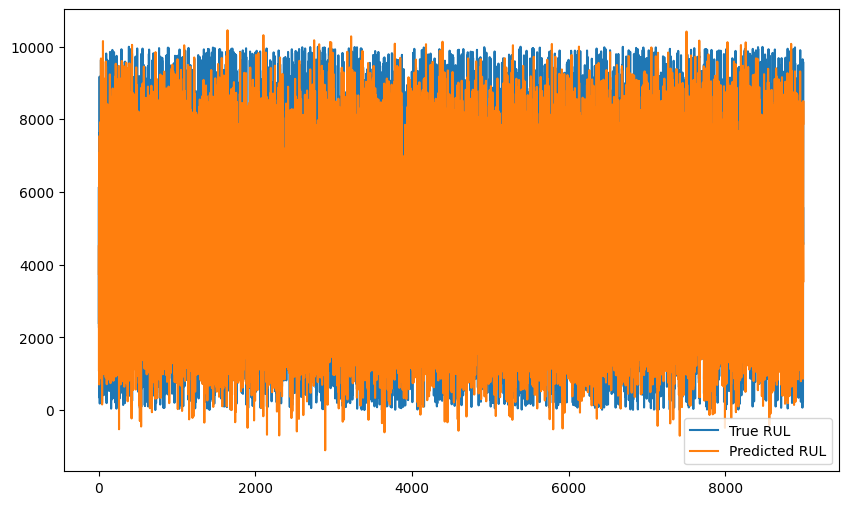

In [ ]:
# 9. Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print("\n")
print(f'Test Loss: {loss}')
print("\n")

# 10. Make predictions (optional)
y_pred = model.predict(X_test)

# 11. Rescale predictions and actual values back to original scale
y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Plot predictions vs true values (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True RUL')
plt.plot(y_pred_rescaled, label='Predicted RUL')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss (MSE): {loss}')

# 2. Make predictions on the test set
y_pred = model.predict(X_test)

# 3. Rescale predictions and actual values back to original scale
y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# 4. Calculate evaluation metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# 5. Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0211
Test Loss (MSE): 0.02067788504064083
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Mean Absolute Error (MAE): 1104.930464947837
Mean Squared Error (MSE): 2067788.7603451859
Root Mean Squared Error (RMSE): 1437.9807927594811
R-squared (R²): 0.7535085195998252


In [ ]:
y_pred[:7]

array([[0.37466422],
       [0.45337388],
       [0.10720659],
       [0.41148552],
       [0.07079498],
       [0.70598334],
       [0.16997   ]], dtype=float32)

In [ ]:
y_test[:7]

array([[0.23991644],
       [0.61359141],
       [0.22673837],
       [0.76168359],
       [0.10826907],
       [0.74926109],
       [0.06304585]])